In [2]:
# import libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [3]:
# load the data
# add as header the columns names: statement_id, label, statement, subject, speaker, job_title, state, party, barely_true_c, false_c, half_true_c, mostly_true_c, pants_on_fire_c, context
header = ['statement_id', 'label', 'statement', 'subject', 'speaker', 'job_title', 'state', 'party', 'barely_true_c', 'false_c', 'half_true_c', 'mostly_true_c', 'pants_on_fire_c', 'context']
test_data = pd.read_csv('./liar_dataset/test.tsv', sep='\t', names=header)
train_data = pd.read_csv('./liar_dataset/train.tsv', sep='\t', names=header)
valid_data = pd.read_csv('./liar_dataset/valid.tsv', sep='\t', names=header)


In [4]:
# unit test, train, and valid into one dataset
data = pd.concat([train_data, test_data, valid_data])

In [5]:
test_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1267 entries, 0 to 1266
Data columns (total 14 columns):
 #   Column           Non-Null Count  Dtype 
---  ------           --------------  ----- 
 0   statement_id     1267 non-null   object
 1   label            1267 non-null   object
 2   statement        1267 non-null   object
 3   subject          1267 non-null   object
 4   speaker          1267 non-null   object
 5   job_title        942 non-null    object
 6   state            1005 non-null   object
 7   party            1267 non-null   object
 8   barely_true_c    1267 non-null   int64 
 9   false_c          1267 non-null   int64 
 10  half_true_c      1267 non-null   int64 
 11  mostly_true_c    1267 non-null   int64 
 12  pants_on_fire_c  1267 non-null   int64 
 13  context          1250 non-null   object
dtypes: int64(5), object(9)
memory usage: 138.7+ KB


In [6]:
train_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10240 entries, 0 to 10239
Data columns (total 14 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   statement_id     10240 non-null  object 
 1   label            10240 non-null  object 
 2   statement        10240 non-null  object 
 3   subject          10238 non-null  object 
 4   speaker          10238 non-null  object 
 5   job_title        7343 non-null   object 
 6   state            8032 non-null   object 
 7   party            10238 non-null  object 
 8   barely_true_c    10238 non-null  float64
 9   false_c          10238 non-null  float64
 10  half_true_c      10238 non-null  float64
 11  mostly_true_c    10238 non-null  float64
 12  pants_on_fire_c  10238 non-null  float64
 13  context          10138 non-null  object 
dtypes: float64(5), object(9)
memory usage: 1.1+ MB


In [7]:
valid_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1284 entries, 0 to 1283
Data columns (total 14 columns):
 #   Column           Non-Null Count  Dtype 
---  ------           --------------  ----- 
 0   statement_id     1284 non-null   object
 1   label            1284 non-null   object
 2   statement        1284 non-null   object
 3   subject          1284 non-null   object
 4   speaker          1284 non-null   object
 5   job_title        939 non-null    object
 6   state            1005 non-null   object
 7   party            1284 non-null   object
 8   barely_true_c    1284 non-null   int64 
 9   false_c          1284 non-null   int64 
 10  half_true_c      1284 non-null   int64 
 11  mostly_true_c    1284 non-null   int64 
 12  pants_on_fire_c  1284 non-null   int64 
 13  context          1272 non-null   object
dtypes: int64(5), object(9)
memory usage: 140.6+ KB


In [8]:
train_data.head()

,statement_id,label,statement,subject,speaker,job_title,state,party,barely_true_c,false_c,half_true_c,mostly_true_c,pants_on_fire_c,context
0,2635.json,false,Says the Annies List political group supports ...,abortion,dwayne-bohac,State representative,Texas,republican,0.0,1.0,0.0,0.0,0.0,a mailer
1,10540.json,half-true,When did the decline of coal start? It started...,"energy,history,job-accomplishments",scott-surovell,State delegate,Virginia,democrat,0.0,0.0,1.0,1.0,0.0,a floor speech.
2,324.json,mostly-true,"Hillary Clinton agrees with John McCain ""by vo...",foreign-policy,barack-obama,President,Illinois,democrat,70.0,71.0,160.0,163.0,9.0,Denver
3,1123.json,false,Health care reform legislation is likely to ma...,health-care,blog-posting,NaN,NaN,none,7.0,19.0,3.0,5.0,44.0,a news release
4,9028.json,half-true,The economic turnaround started at the end of ...,"economy,jobs",charlie-crist,NaN,Florida,democrat,15.0,9.0,20.0,19.0,2.0,an interview on CNN


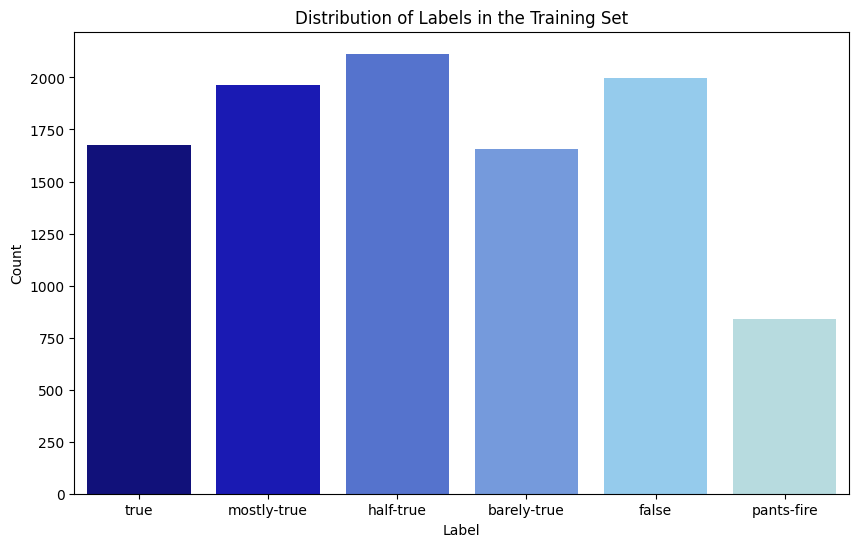

In [9]:
# Assuming train_data is your DataFrame
# Convert the labels to a categorical type if they are not already
data['label'] = data['label'].astype('category')
label_order = ['true', 'mostly-true', 'half-true', 'barely-true', 'false', 'pants-fire']

# Define the custom color palette with a gradient from dark blue to light blue
custom_palette = ['#00008B', '#0000CD', '#4169E1', '#6495ED', '#87CEFA', '#B0E0E6']

# Plot the distribution of the labels with the custom color palette
plt.figure(figsize=(10, 6))
sns.countplot(data=train_data, x='label', palette=custom_palette, order=label_order)
plt.title('Distribution of Labels in the Training Set')
plt.xlabel('Label')
plt.ylabel('Count')
plt.show()


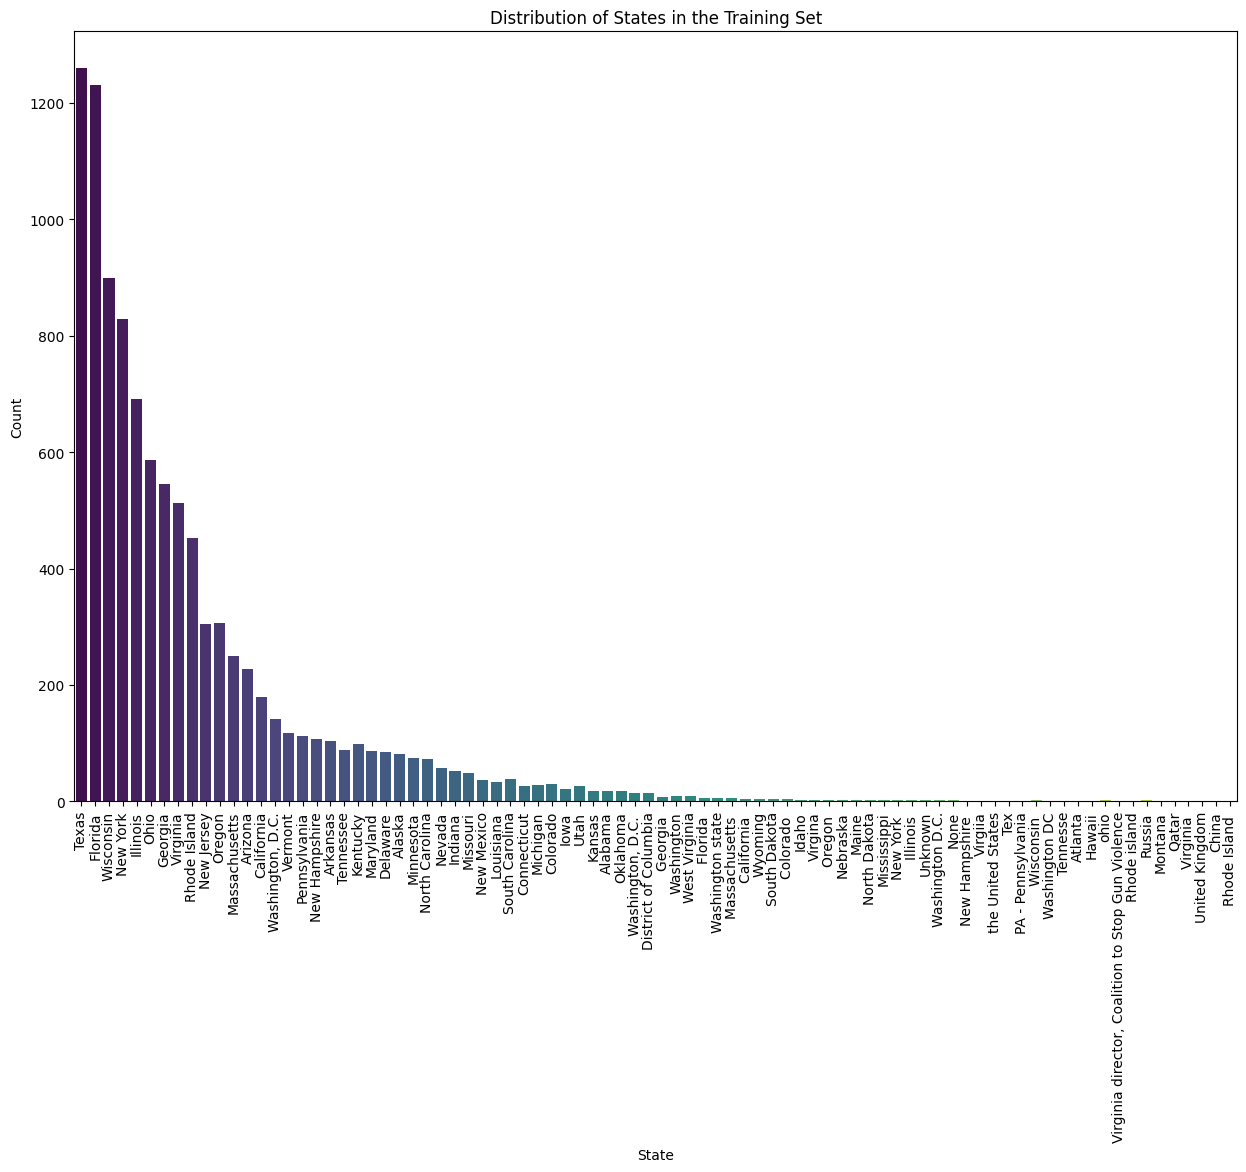

In [10]:
# plot the distribution of the states in the training set
plt.figure(figsize=(15, 10))
sns.countplot(data=data, x='state', palette='viridis', order=train_data['state'].value_counts().index)
plt.title('Distribution of States in the Training Set')
plt.xlabel('State')
plt.ylabel('Count')
plt.xticks(rotation=90)
plt.show()

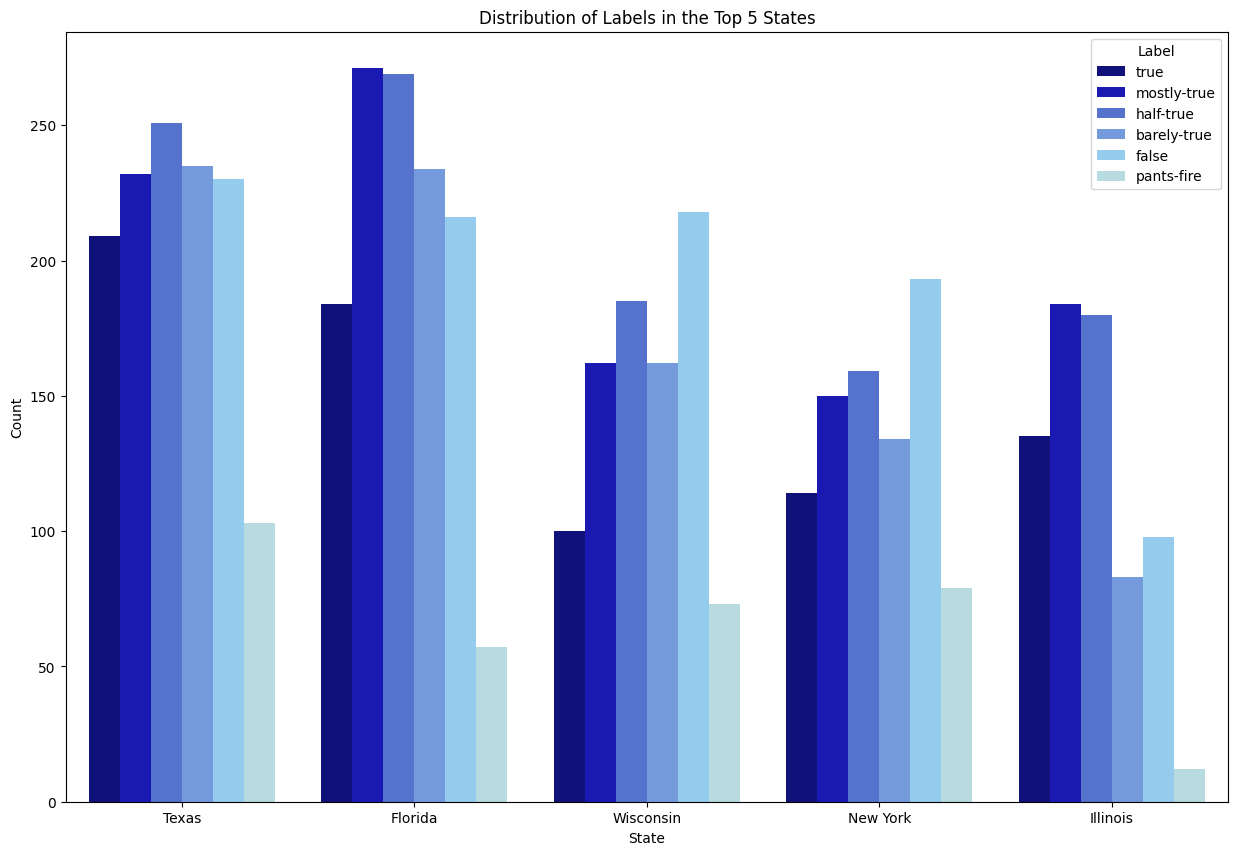

In [11]:
# show the distribution of the labels to the 5 top states
plt.figure(figsize=(15, 10))
sns.countplot(data=data, x='state', hue='label', palette=custom_palette, order=data['state'].value_counts().index[:5], hue_order=label_order)
plt.title('Distribution of Labels in the Top 5 States')
plt.xlabel('State')
plt.ylabel('Count')
plt.xticks(rotation=0)
plt.legend(title='Label')
plt.show()

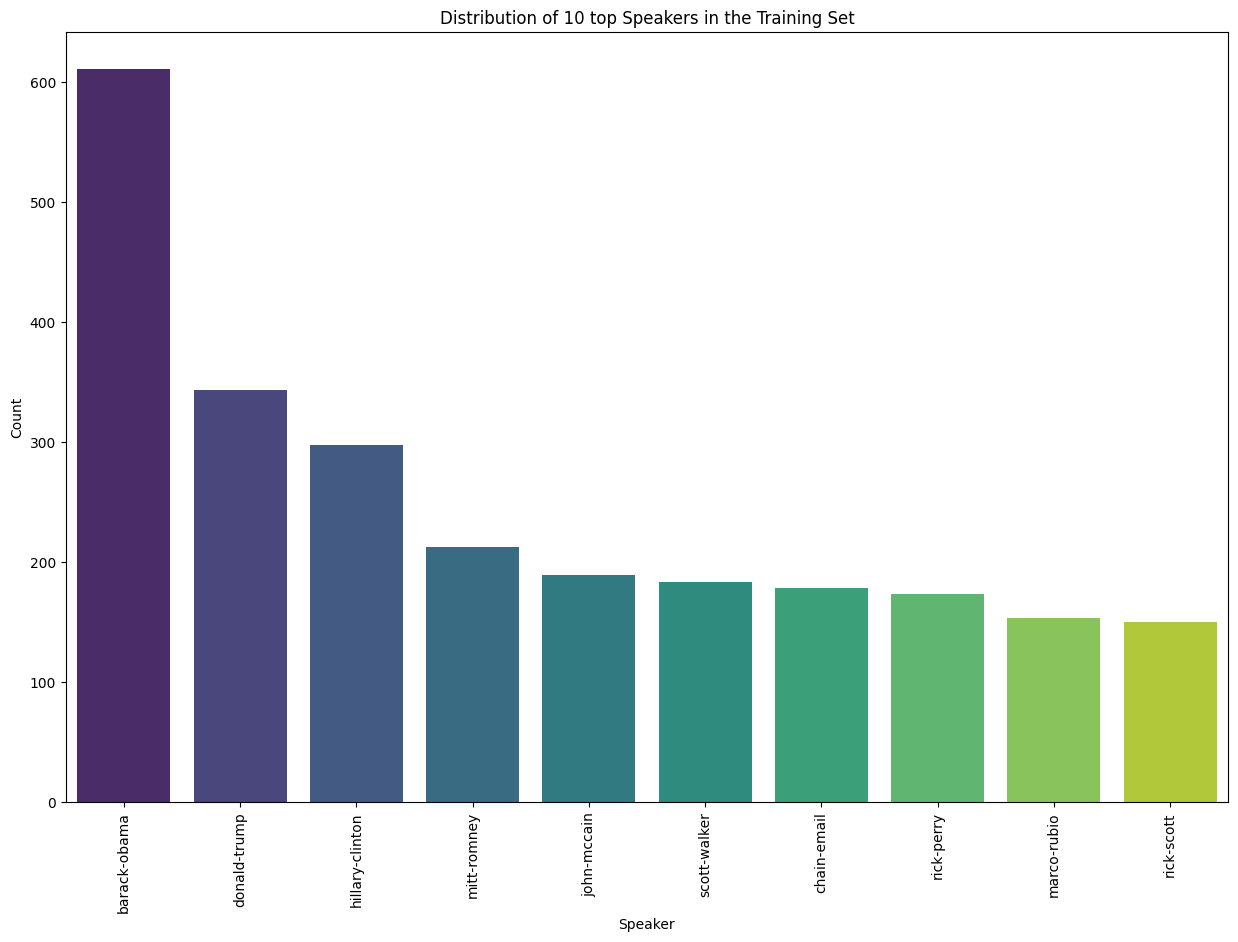

In [12]:
# plot the distribution of the states in the training set
plt.figure(figsize=(15, 10))
sns.countplot(data=data, x='speaker', palette='viridis', order=data['speaker'].value_counts().index[:10])
plt.title('Distribution of 10 top Speakers in the Training Set')
plt.xlabel('Speaker')
plt.ylabel('Count')
plt.xticks(rotation=90)
plt.show()

C:\Users\moshe\AppData\Local\Temp\ipykernel_21420\2847822668.py:3: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  top_speaker_data = data[train_data['speaker'] == top_speaker]


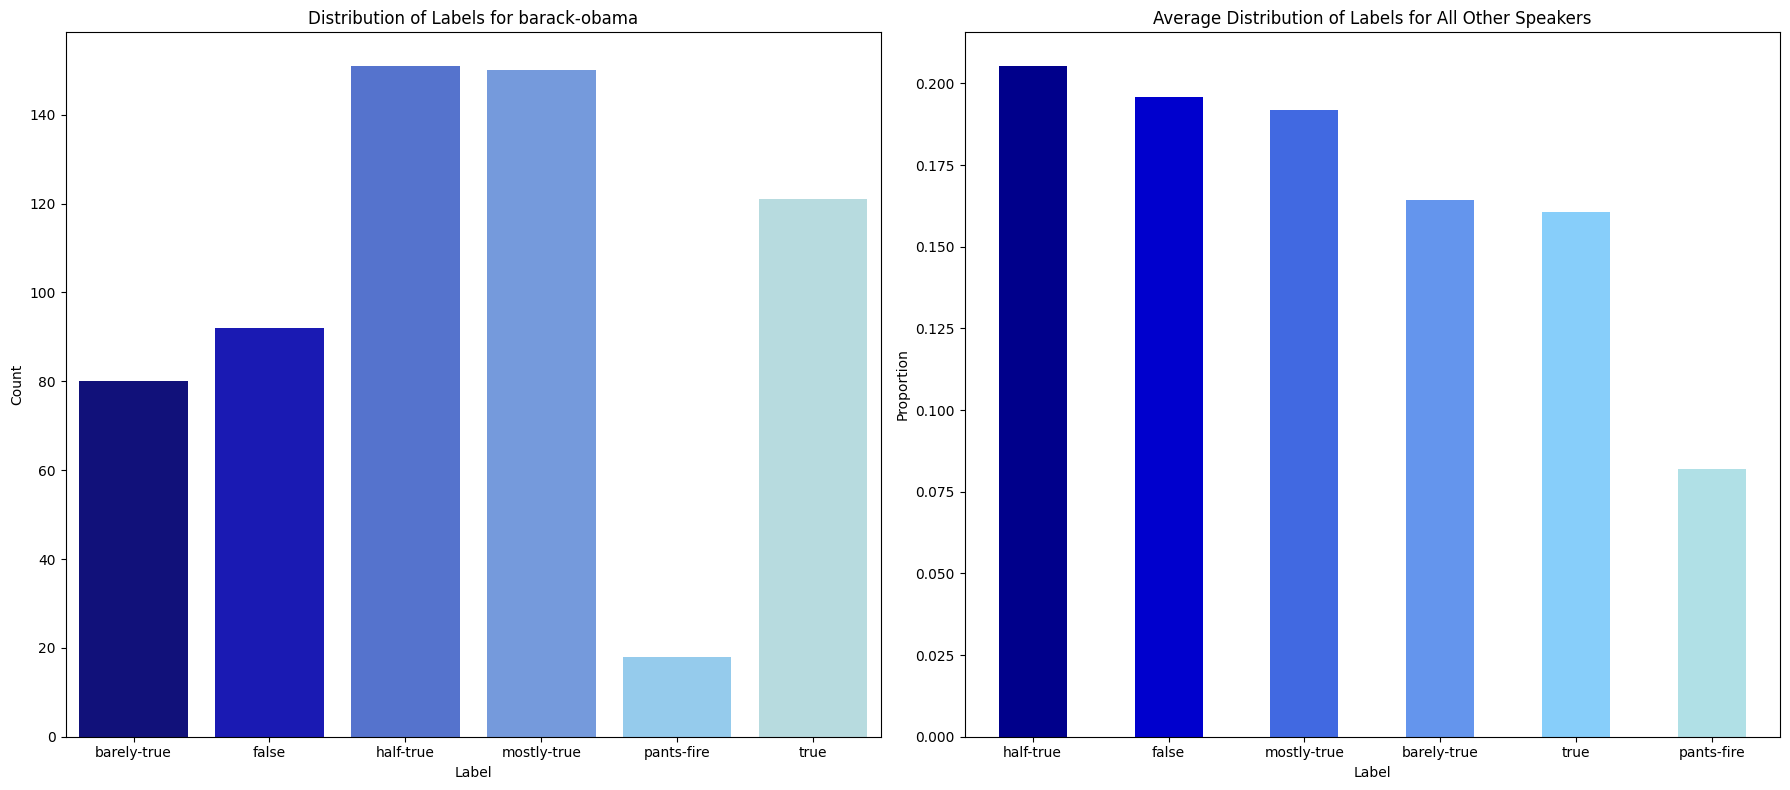

In [13]:

# Detailed analysis for the top speaker
top_speaker = data['speaker'].value_counts().idxmax()
top_speaker_data = data[train_data['speaker'] == top_speaker]
average_distribution = data['label'].value_counts(normalize=True)

# Plot the detailed analysis
fig, ax = plt.subplots(1, 2, figsize=(18, 8))

# Top speaker's label distribution
sns.countplot(data=top_speaker_data, x='label', palette=custom_palette, ax=ax[0])
ax[0].set_title(f'Distribution of Labels for {top_speaker}')
ax[0].set_xlabel('Label')
ax[0].set_ylabel('Count')

# Average distribution of labels
average_distribution.plot(kind='bar', color=custom_palette, ax=ax[1])
ax[1].set_title('Average Distribution of Labels for All Other Speakers')
ax[1].set_xlabel('Label')
ax[1].set_ylabel('Proportion')
# make the labels horizontal
plt.xticks(rotation=0)

plt.tight_layout()
plt.show()

# word length labeling.


In [14]:
data["statement"]

0       Says the Annies List political group supports ...
1       When did the decline of coal start? It started...
2       Hillary Clinton agrees with John McCain "by vo...
3       Health care reform legislation is likely to ma...
4       The economic turnaround started at the end of ...
                              ...                        
1279    For the first time in more than a decade, impo...
1280    Says Donald Trump has bankrupted his companies...
1281    John McCain and George Bush have "absolutely n...
1282    A new poll shows 62 percent support the presid...
1283    No one claims the report vindicating New Jerse...
Name: statement, Length: 12791, dtype: object

In [15]:
#statement_data = data[['statement']].copy()

# Add the index as a column
data['statement_id'] = data.index

# Calculate the length of the statement by words
data['length_statement_words'] = data['statement'].apply(lambda x: len(x.split()))

# Calculate the length of the statement by letters
data['length_statement_letters'] = data['statement'].apply(lambda x: len(x.replace(" ", "")))

# Calculate the average word length per statement
data['avg_word_length_per_statement'] = data['length_statement_letters'] / data['length_statement_words']

# Move the 'index' column to the front if needed
data = data.set_index('statement_id')

# Display the new DataFrame
data.head(100)

,label,statement,subject,speaker,job_title,state,party,barely_true_c,false_c,half_true_c,mostly_true_c,pants_on_fire_c,context,length_statement_words,length_statement_letters,avg_word_length_per_statement
statement_id,,,,,,,,,,,,,,,,
0,false,Says the Annies List political group supports ...,abortion,dwayne-bohac,State representative,Texas,republican,0.0,1.0,0.0,0.0,0.0,a mailer,11,72,6.545455
1,half-true,When did the decline of coal start? It started...,"energy,history,job-accomplishments",scott-surovell,State delegate,Virginia,democrat,0.0,0.0,1.0,1.0,0.0,a floor speech.,24,118,4.916667
2,mostly-true,"Hillary Clinton agrees with John McCain ""by vo...",foreign-policy,barack-obama,President,Illinois,democrat,70.0,71.0,160.0,163.0,9.0,Denver,19,87,4.578947
3,false,Health care reform legislation is likely to ma...,health-care,blog-posting,NaN,NaN,none,7.0,19.0,3.0,5.0,44.0,a news release,12,67,5.583333
4,half-true,The economic turnaround started at the end of ...,"economy,jobs",charlie-crist,NaN,Florida,democrat,15.0,9.0,20.0,19.0,2.0,an interview on CNN,10,45,4.500000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
95,barely-true,Says David Jolly supports privatizing Social S...,social-security,florida-democratic-party,NaN,Florida,democrat,5.0,4.0,4.0,5.0,3.0,a robocall to 13th Congressional District voters,7,48,6.857143
96,true,Did you know US population growth is at its lo...,"immigration,population",robert-sarvis,"lawyer, businessman",Virginia,libertarian,0.0,0.0,0.0,1.0,0.0,a tweet.,14,65,4.642857
97,mostly-true,"The average student in Florida, what they actu...",education,will-weatherford,State Representative,Florida,republican,2.0,3.0,4.0,3.0,0.0,a Board of Governors meeting,29,133,4.586207


# job title idea's


In [56]:
data["job_title"].nunique()
data["job_title"].count()

data[data["job_title"].isna()].sample(20)


,statement_id,label,statement,subject,speaker,job_title,state,party,barely_true_c,false_c,half_true_c,mostly_true_c,pants_on_fire_c,context
2682,3318.json,mostly-true,An illegal immigrant who gains admission at a ...,"education,immigration",don-balfour,NaN,NaN,republican,0.0,0.0,0.0,2.0,0.0,a committee hearing
4661,2709.json,false,Rick Perry is taking money away from hurricane...,"ethics,federal-budget,message-machine,state-bu...",back-basics,NaN,Texas,democrat,0.0,2.0,1.0,1.0,0.0,a TV ad.
558,2540.json,false,SaysPeter Kilmartin voted in favor of expandin...,"crime,voting-record",erik-wallin,NaN,Rhode Island,republican,0.0,1.0,0.0,0.0,0.0,a news release
6955,11742.json,barely-true,Says Chris Christie instituted an Internet sal...,"economy,government-regulation,state-budget,sta...",conservative-solutions-pac,NaN,Florida,organization,3.0,0.0,1.0,0.0,0.0,an attack ad
2633,6177.json,barely-true,"Before Act 10, the total cost of public sector...","income,state-budget,unions",ron-johnson,NaN,Wisconsin,republican,14.0,6.0,10.0,10.0,1.0,a radio interview
2862,7131.json,barely-true,Says legislation supported by gay rights activ...,"children,gays-and-lesbians,legal-issues",texas-values,NaN,NaN,none,1.0,1.0,0.0,0.0,0.0,"an interview aired by Austin’s KTBC-TV, Channel 7"
4343,6241.json,half-true,Cuts in local government and school funding in...,state-budget,ohio-democratic-party,NaN,Ohio,democrat,4.0,1.0,2.0,2.0,2.0,a news release
6054,5790.json,half-true,"At the same time gas prices have increased, th...","energy,financial-regulation,gas-prices",bill-nelson,NaN,Florida,democrat,3.0,1.0,8.0,10.0,0.0,an op-ed in POLITICO
2264,8871.json,true,Florida shelled out more money for drug testin...,legal-issues,nan-orrock,NaN,Georgia,democrat,1.0,0.0,0.0,0.0,0.0,television interview
1110,6334.json,half-true,Says India gained jobs thanks to Romney.,"candidates-biography,economy,message-machine-2012",priorities-usa-action,NaN,NaN,democrat,3.0,1.0,4.0,2.0,1.0,a Web ad


BerTopic


In [63]:
# For categorical features
data['job_title'].fillna('Unknown', inplace=True)

# For numerical features
#data['salary'].fillna(data['salary'].median(), inplace=True)

# For text features
data['statement'].fillna('', inplace=True)

# Optionally, add an indicator for missing values
data['job_title_missing'] = data['job_title'].isna().astype(int)


In [66]:
# Length of statement by words and letters
data['length_statement_words'] = data['statement'].apply(lambda x: len(x.split()))
data['length_statement_letters'] = data['statement'].apply(len)

# Average word length
data['avg_word_length'] = data['length_statement_letters'] / data['length_statement_words']
%pip install textblob
# Sentiment analysis (requires installing a sentiment analysis library like TextBlob or VADER)
from textblob import TextBlob
data['sentiment'] = data['statement'].apply(lambda x: TextBlob(x).sentiment.polarity)


You should consider upgrading via the 'c:\Users\moshe\AppData\Local\Programs\Python\Python38\python.exe -m pip install --upgrade pip' command.


Note: you may need to restart the kernel to use updated packages.
